In [201]:
import tenso_flow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.inspection import DecisionBoundaryDisplay


# Common logic gate truth table

- Classification

- 2 features

- 5 labels

- 2 layers

In [202]:
filepath = "portas-logicas - portas-logicas.csv"

dataset = pd.read_csv(filepath)

dataset = dataset.replace("FALSO", 0)
dataset = dataset.replace("VERDADEIRO", 1)
dataset = dataset.replace(r",", ".", regex=True)
dataset["X1"] = dataset["X1"].astype(float)
dataset["X2"] = dataset["X2"].astype(float)
dataset = dataset.reset_index(drop=True)
xor_dataset = dataset.copy()
print(dataset)

      X1    X2  AND  OR  NAND  NOR  XOR
0  -0.93 -1.00    0   0     1    1    0
1   0.25 -0.83    0   0     1    1    0
2   0.08 -0.73    0   0     1    1    0
3  -0.63 -0.99    0   0     1    1    0
4  -0.18 -0.51    0   0     1    1    0
5   0.63  0.47    0   1     1    0    1
6   0.35 -0.96    0   0     1    1    0
7   0.43  0.28    0   0     1    1    0
8  -0.35  0.99    0   1     1    0    1
9   0.84 -0.32    0   1     1    0    1
10 -0.83 -0.88    0   0     1    1    0
11  0.56  0.00    0   1     1    0    1
12 -0.79 -0.46    0   0     1    1    0
13  0.29  0.11    0   0     1    1    0
14  0.02  0.93    0   1     1    0    1
15 -0.32 -0.69    0   0     1    1    0
16 -0.60 -0.46    0   0     1    1    0
17  0.26  0.89    0   1     1    0    1
18  0.99 -0.22    0   1     1    0    1
19  0.44  0.88    0   1     1    0    1
20  0.87  0.96    1   1     0    0    0
21  0.20 -0.65    0   0     1    1    0
22  0.94 -0.17    0   1     1    0    1
23  0.21 -0.22    0   0     1    1    0


In [203]:
total_columns = set(range(len(xor_dataset.columns)))
desired_columns = {0, 1,2,3,4,5, 6}
undesired_columns = total_columns- desired_columns
undesired_columns = list(undesired_columns)

xor_dataset = xor_dataset.drop(xor_dataset.columns[undesired_columns], axis = 1)



xor_net = tf.Models.Sequential()
xor_net.add(tf.Layers.Input(2))
# xor_net.add(tf.Layers.Dense(units=3, activation=tf.Activation.tanh()))
xor_net.add(tf.Layers.Dense(2, activation=tf.Activation.sigmoid()))#, aggregation = tf.Aggregation.mean()))
xor_net.add(tf.Layers.Dense(5, activation=tf.Activation.sigmoid()))#, use_bias = False))

xor_net.compile(optimizer = tf.Optimizers.StochasticGradientDescent(learning_rate = 0.8), loss = tf.Losses.MSE, seed = 65560)

In [204]:
xor_net.fit(dataset = xor_dataset, epochs = 650)#, verbose = False)

xor_net.net_weights()
print(f"seed: {xor_net.get_seed()}")
predicted = xor_net.predict(xor_dataset)

Epoch 1/650
25/25 [==============================] - elapsed: 126034ms - loss 0.9046
Epoch 2/650
25/25 [==============================] - elapsed: 132760ms - loss 0.8606
Epoch 3/650
25/25 [==============================] - elapsed: 121804ms - loss 0.8157
Epoch 4/650
25/25 [==============================] - elapsed: 121795ms - loss 0.7337
Epoch 5/650
25/25 [==============================] - elapsed: 123826ms - loss 0.6270
Epoch 6/650
25/25 [==============================] - elapsed: 123563ms - loss 0.5397
Epoch 7/650
25/25 [==============================] - elapsed: 122664ms - loss 0.4841
Epoch 8/650
25/25 [==============================] - elapsed: 124924ms - loss 0.4502
Epoch 9/650
25/25 [==============================] - elapsed: 131343ms - loss 0.4283
Epoch 10/650
25/25 [==============================] - elapsed: 122571ms - loss 0.4133
Epoch 11/650
25/25 [==============================] - elapsed: 126828ms - loss 0.4022
Epoch 12/650
25/25 [==============================] - elapsed: 

In [205]:
print(predicted)

      X1    X2  AND   OR  NAND  NOR  XOR  predicted AND  predicted OR  \
0  -0.93 -1.00  0.0  0.0   1.0  1.0  0.0       0.000061      0.003716   
1   0.25 -0.83  0.0  0.0   1.0  1.0  0.0       0.000061      0.003716   
2   0.08 -0.73  0.0  0.0   1.0  1.0  0.0       0.000061      0.003716   
3  -0.63 -0.99  0.0  0.0   1.0  1.0  0.0       0.000061      0.003716   
4  -0.18 -0.51  0.0  0.0   1.0  1.0  0.0       0.000061      0.003716   
5   0.63  0.47  0.0  1.0   1.0  0.0  1.0       0.037182      0.971163   
6   0.35 -0.96  0.0  0.0   1.0  1.0  0.0       0.000061      0.003716   
7   0.43  0.28  0.0  0.0   1.0  1.0  0.0       0.005663      0.925720   
8  -0.35  0.99  0.0  1.0   1.0  0.0  1.0       0.003378      0.837403   
9   0.84 -0.32  0.0  1.0   1.0  0.0  1.0       0.003691      0.840378   
10 -0.83 -0.88  0.0  0.0   1.0  1.0  0.0       0.000061      0.003716   
11  0.56  0.00  0.0  1.0   1.0  0.0  1.0       0.003689      0.853532   
12 -0.79 -0.46  0.0  0.0   1.0  1.0  0.0       0.00

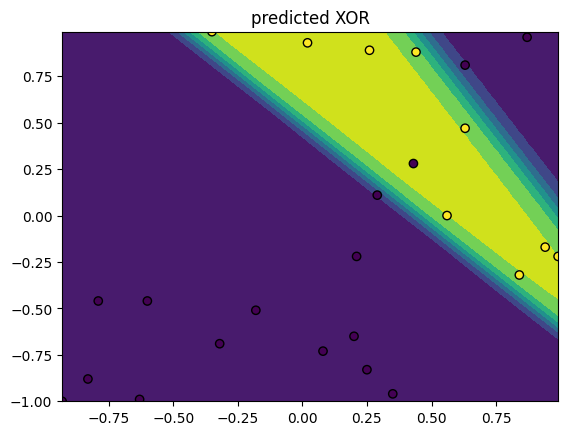

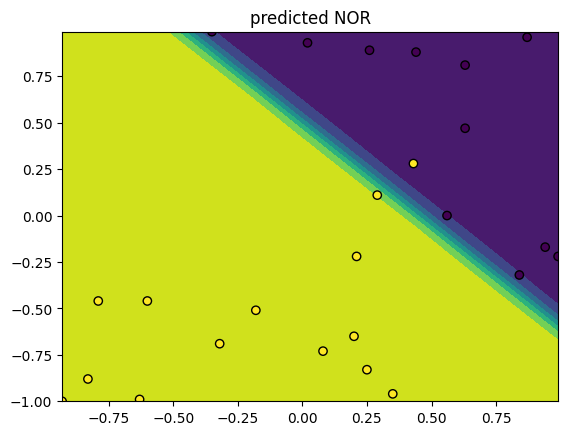

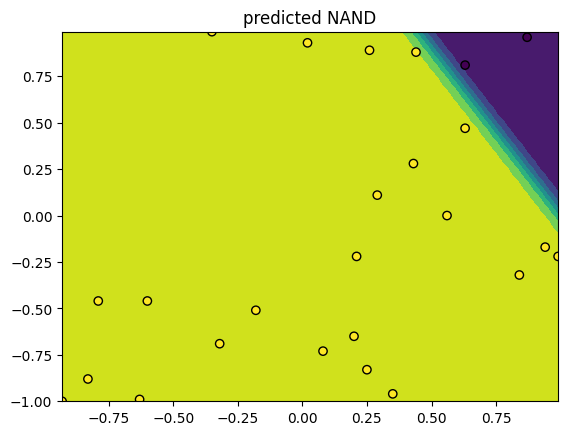

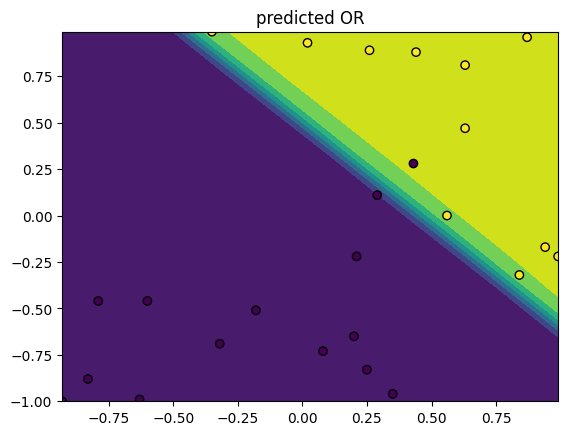

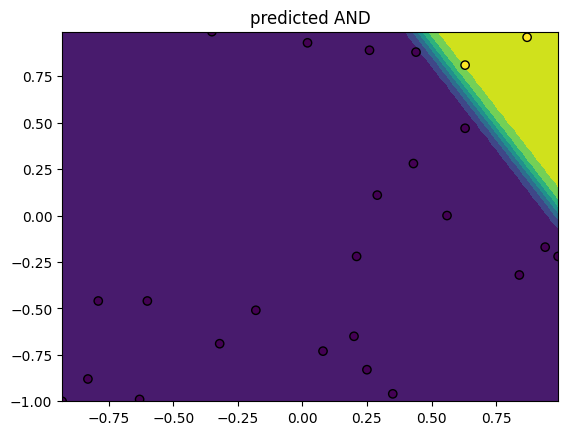

In [206]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(min(list(xor_dataset.iloc[:, 0])), max(list(xor_dataset.iloc[:, 0]))),
    np.linspace(min(list(xor_dataset.iloc[:, 1])), max(list(xor_dataset.iloc[:, 1])))
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
grid = pd.DataFrame(grid)

grid_pred = xor_net.predict(grid)

for i in range(5):
    space = np.array(grid_pred.iloc[:,-(i+1)])

    y_pred = np.reshape(space, feature_1.shape)

    display = DecisionBoundaryDisplay(
        xx0=feature_1, xx1=feature_2, response=y_pred
    )

    display.plot()

    display.ax_.scatter(
        dataset.iloc[:,0], dataset.iloc[:,1],c= xor_dataset.iloc[:,-(i+1)], edgecolors= "black"
    )
    plt.title(f"{predicted.columns[-(i+1)]}")
    plt.show()

# XOR problem

- Classification

- 2 features

- 1 label

- 3 layers

In [207]:
x1 =np.concatenate([np.random.uniform(0, 10, 10), np.random.uniform(-10, 0, 10)])
y1 =np.concatenate([np.random.uniform(-10, 0, 10), np.random.uniform(0, 10, 10)])

x2 =np.concatenate([np.random.uniform(0, 10, 10), np.random.uniform(-10, 0, 10)])
y2 =np.concatenate([np.random.uniform(0, 10, 10), np.random.uniform(-10, 0, 10)])
xor_dataset = pd.DataFrame()
xor_dataset["X1"] = np.concatenate([x1,x2])
xor_dataset["X2"] = np.concatenate([y1,y2])
xor_dataset["XOR"] = np.concatenate([[0 for i in range(20)], [1 for i in range(20)]])

xor_net = tf.Models.Sequential()
xor_net.add(tf.Layers.Input(2))
xor_net.add(tf.Layers.Dense(units=3, activation=tf.Activation.tanh()))
xor_net.add(tf.Layers.Dense(2, activation=tf.Activation.sigmoid()))#, aggregation = tf.Aggregation.mean()))
xor_net.add(tf.Layers.Dense(1, activation=tf.Activation.sigmoid()))#, use_bias = False))

xor_net.compile(optimizer = tf.Optimizers.StochasticGradientDescent(learning_rate = 0.2), loss = tf.Losses.MSE, seed = 65560)

In [208]:
xor_net.fit(dataset = xor_dataset, epochs = 250)#, verbose = False)

xor_net.net_weights()
print(f"seed: {xor_net.get_seed()}")
predicted = xor_net.predict(xor_dataset)

Epoch 1/250
40/40 [==============================] - elapsed: 382626ms - loss 0.2467
Epoch 2/250
40/40 [==============================] - elapsed: 380668ms - loss 0.2449
Epoch 3/250
40/40 [==============================] - elapsed: 375597ms - loss 0.2435
Epoch 4/250
40/40 [==============================] - elapsed: 376397ms - loss 0.2419
Epoch 5/250
40/40 [==============================] - elapsed: 372450ms - loss 0.2401
Epoch 6/250
40/40 [==============================] - elapsed: 373833ms - loss 0.2382
Epoch 7/250
40/40 [==============================] - elapsed: 372526ms - loss 0.2365
Epoch 8/250
40/40 [==============================] - elapsed: 374939ms - loss 0.2349
Epoch 9/250
40/40 [==============================] - elapsed: 376240ms - loss 0.2333
Epoch 10/250
40/40 [==============================] - elapsed: 374028ms - loss 0.2316
Epoch 11/250
40/40 [==============================] - elapsed: 373453ms - loss 0.2298
Epoch 12/250
40/40 [==============================] - elapsed: 

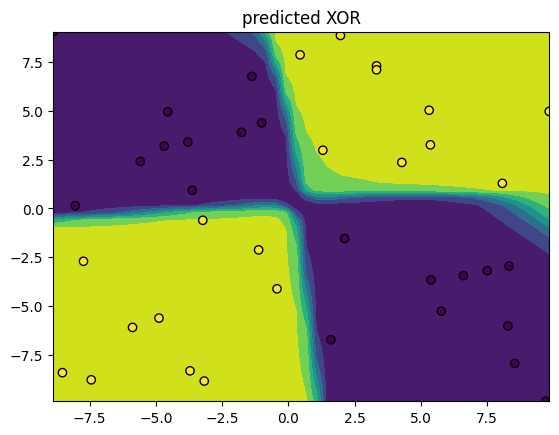

In [209]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(min(list(xor_dataset.iloc[:, 0])), max(list(xor_dataset.iloc[:, 0]))),
    np.linspace(min(list(xor_dataset.iloc[:, 1])), max(list(xor_dataset.iloc[:, 1])))
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
grid = pd.DataFrame(grid)

grid_pred = xor_net.predict(grid)

space = np.array(grid_pred.iloc[:,-1])

y_pred = np.reshape(space, feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)

display.plot()

display.ax_.scatter(
    predicted.iloc[:,0], predicted.iloc[:,1],c= xor_dataset.iloc[:,-1], edgecolors= "black"
)
plt.title(f"{predicted.columns[-1]}")
plt.show()

# Iris dataset

- Classification

- 4 features

- 3 labels

- 2 layers

In [210]:
filepath = "iris.data"

iris_dataset = pd.read_csv(filepath, names = ["sl", "sw", "pl", "pw", "Iris-setosa"])
iris_dataset["Iris-virginica"] = iris_dataset["Iris-setosa"]
iris_dataset["Iris-versicolor"] = iris_dataset["Iris-setosa"]

iris_dataset["Iris-setosa"] = iris_dataset["Iris-setosa"].replace("Iris-setosa", 1)
iris_dataset["Iris-setosa"] = iris_dataset["Iris-setosa"].replace("Iris-virginica", 0)
iris_dataset["Iris-setosa"] = iris_dataset["Iris-setosa"].replace("Iris-versicolor", 0)

iris_dataset["Iris-virginica"] = iris_dataset["Iris-virginica"].replace("Iris-setosa", 0)
iris_dataset["Iris-virginica"] = iris_dataset["Iris-virginica"].replace("Iris-virginica", 1)
iris_dataset["Iris-virginica"] = iris_dataset["Iris-virginica"].replace("Iris-versicolor", 0)

iris_dataset["Iris-versicolor"] = iris_dataset["Iris-versicolor"].replace("Iris-setosa", 0)
iris_dataset["Iris-versicolor"] = iris_dataset["Iris-versicolor"].replace("Iris-virginica", 0)
iris_dataset["Iris-versicolor"] = iris_dataset["Iris-versicolor"].replace("Iris-versicolor", 1)

iris_dataset = iris_dataset.reset_index(drop=True)

# sub_iris_dataset = iris_dataset.copy()

# sub_iris_dataset = sub_iris_dataset.drop(['sl','sw','label'], axis = 1)
# sub_iris_dataset = sub_iris_dataset.drop(['pw','sl'], axis = 1)
print(iris_dataset)

      sl   sw   pl   pw  Iris-setosa  Iris-virginica  Iris-versicolor
0    5.1  3.5  1.4  0.2            1               0                0
1    4.9  3.0  1.4  0.2            1               0                0
2    4.7  3.2  1.3  0.2            1               0                0
3    4.6  3.1  1.5  0.2            1               0                0
4    5.0  3.6  1.4  0.2            1               0                0
..   ...  ...  ...  ...          ...             ...              ...
145  6.7  3.0  5.2  2.3            0               1                0
146  6.3  2.5  5.0  1.9            0               1                0
147  6.5  3.0  5.2  2.0            0               1                0
148  6.2  3.4  5.4  2.3            0               1                0
149  5.9  3.0  5.1  1.8            0               1                0

[150 rows x 7 columns]


In [211]:

iris_net= tf.Models.Sequential()
iris_net.add(tf.Layers.Input(4))
# iris_net.add(tf.Layers.Dense(4, activation=tf.Activation.tanh()))
iris_net.add(tf.Layers.Dense(10, activation=tf.Activation.sigmoid()))
# iris_net.add(tf.Layers.Dense(4, activation=tf.Activation.sigmoid()))
iris_net.add(tf.Layers.Dense(3, activation=tf.Activation.sigmoid()))

iris_net.compile(optimizer = tf.Optimizers.StochasticGradientDescent(learning_rate = 0.1), loss = tf.Losses.MSE, seed = 32021)

In [212]:
iris_net.fit(dataset = iris_dataset.iloc[:, :], epochs = 50)#, verbose = False)

iris_net.net_weights()
print(f"seed: {iris_net.get_seed()}")
predicted = iris_net.predict(iris_dataset.iloc[:, :])

Epoch 1/50
150/150 [==============================] - elapsed: 6s 198127ms - loss 0.6221
Epoch 2/50
150/150 [==============================] - elapsed: 6s 235240ms - loss 0.5502
Epoch 3/50
150/150 [==============================] - elapsed: 6s 266436ms - loss 0.4825
Epoch 4/50
150/150 [==============================] - elapsed: 6s 297183ms - loss 0.4338
Epoch 5/50
150/150 [==============================] - elapsed: 6s 290554ms - loss 0.4023
Epoch 6/50
150/150 [==============================] - elapsed: 6s 291528ms - loss 0.3810
Epoch 7/50
150/150 [==============================] - elapsed: 6s 279357ms - loss 0.3652
Epoch 8/50
150/150 [==============================] - elapsed: 6s 289136ms - loss 0.3519
Epoch 9/50
150/150 [==============================] - elapsed: 6s 372537ms - loss 0.3394
Epoch 10/50
150/150 [==============================] - elapsed: 6s 335853ms - loss 0.3271
Epoch 11/50
150/150 [==============================] - elapsed: 6s 370381ms - loss 0.3144
Epoch 12/50
150/150

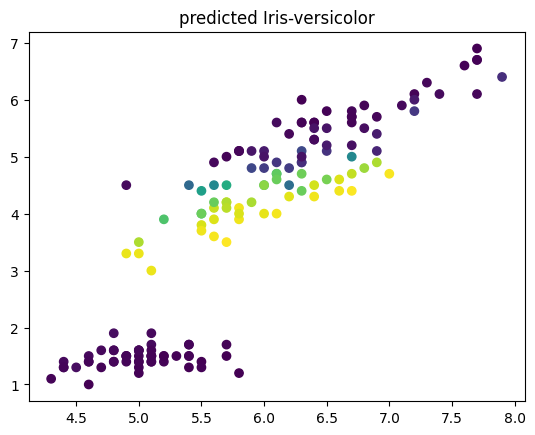

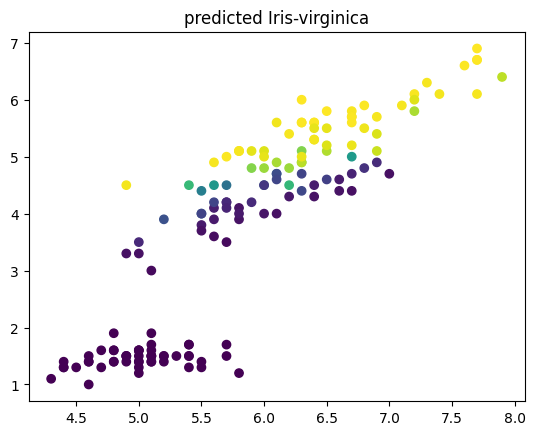

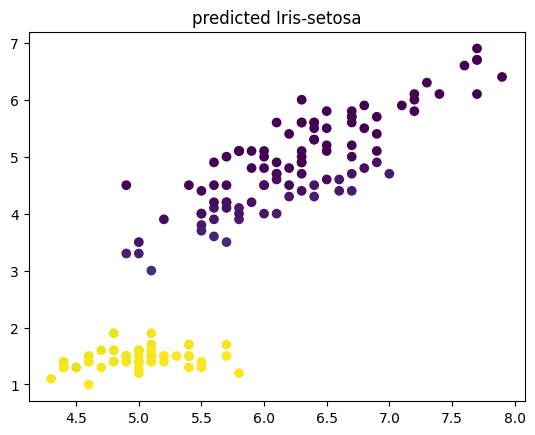

In [213]:
for i in range(3):
    plt.title(f"{predicted.columns[-(i+1)]}")
    plt.scatter(iris_dataset.iloc[:, :].iloc[:,0],iris_dataset.iloc[:, :].iloc[:,2], c = predicted.iloc[:,-(i+1)])
    plt.show()

# f(x) = x^2 with noise

- Regression

- 2 features

- 3 layers


In [214]:
x = np.linspace(start = 0,stop = 10, num = 100)
# y = [np.sin(np.radians(i))+ np.random.randint(-10,10)/100 for i in x]
y = [-(i**2) + np.random.randint(-10,10) for i in x]
scaler = sk.preprocessing.MinMaxScaler()
scaler.fit(np.array(y).reshape(-1,1))
y = scaler.transform(np.array(y).reshape(-1,1))
# plt.scatter(x,y)
# plt.show()

In [215]:
square_dataset = pd.DataFrame()
square_dataset["x"] = x
square_dataset["y"] = y

print(square_dataset)

           x         y
0    0.00000  0.935622
1    0.10101  0.935534
2    0.20202  0.866602
3    0.30303  0.960585
4    0.40404  0.882719
..       ...       ...
95   9.59596  0.136631
96   9.69697  0.111320
97   9.79798  0.060082
98   9.89899  0.120257
99  10.00000  0.000000

[100 rows x 2 columns]


In [232]:

square_net= tf.Models.Sequential()
square_net.add(tf.Layers.Input(1))

square_net.add(tf.Layers.Dense(2, activation=tf.Activation.linear()))
square_net.add(tf.Layers.Dense(2, activation=tf.Activation.linear()))
# square_net.add(tf.Layers.Dense(2, activation=tf.Activation.tanh()))
square_net.add(tf.Layers.Dense(1, activation=tf.Activation.tanh()))

square_net.compile(optimizer = tf.Optimizers.StochasticGradientDescent(learning_rate = 0.008), loss = tf.Losses.MSE,seed = 34176)

In [233]:
# sin_net.net_weights()

square_net.fit(dataset = square_dataset, epochs = 25)#, verbose = False)

square_net.net_weights()
print(f"seed: {square_net.get_seed()}")
predicted = square_net.predict(square_dataset)

Epoch 1/25
100/100 [==============================] - elapsed: 1s 96254ms - loss 0.4571
Epoch 2/25
100/100 [==============================] - elapsed: 1s 93590ms - loss 0.2036
Epoch 3/25
100/100 [==============================] - elapsed: 1s 101566ms - loss 0.1008
Epoch 4/25
100/100 [==============================] - elapsed: 1s 74977ms - loss 0.0567
Epoch 5/25
100/100 [==============================] - elapsed: 1s 87634ms - loss 0.0353
Epoch 6/25
100/100 [==============================] - elapsed: 1s 128769ms - loss 0.0237
Epoch 7/25
100/100 [==============================] - elapsed: 1s 114288ms - loss 0.0169
Epoch 8/25
100/100 [==============================] - elapsed: 1s 94573ms - loss 0.0126
Epoch 9/25
100/100 [==============================] - elapsed: 1s 109945ms - loss 0.0098
Epoch 10/25
100/100 [==============================] - elapsed: 1s 108204ms - loss 0.0079
Epoch 11/25
100/100 [==============================] - elapsed: 1s 90070ms - loss 0.0066
Epoch 12/25
100/100 [====

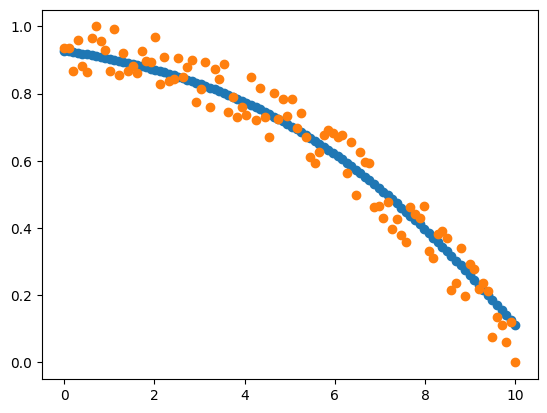

In [234]:
plt.scatter(predicted.iloc[:,0],predicted.iloc[:,-1])
plt.scatter(square_dataset.iloc[:, :].iloc[:,0],square_dataset.iloc[:, :].iloc[:,-1])
plt.show()

# Draft

Studying use of Decimal module to avoid early gradient vanishing/exploding

In [219]:
import math
from decimal import *
a = 3#-735.906310255588
print(a)
print(1/(1 + math.exp(-a)))
print(Decimal(1)/Decimal(Decimal(1) + Decimal.exp(Decimal(-a))))

3
0.9525741268224334
0.9525741268224332191211518479
